
Dataset Collection & Information Overview

>**Source of Data**


>**Customer Demographic Information**


>**Account & Credit Information**


>**Payment Behavior & History**


>**Delinquency & Risk Indicators**




Load & Inspect the Dataset

In [13]:
import pandas as lal
import numpy as num
import matplotlib.pyplot as plt
import seaborn as sns

df = lal.read_csv("/content/Delinquency_prediction_dataset_fixed.csv")
df.head()


,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,CUST0001,56,165580.0,398.0,0.390502,3,0,16310.0,0.317396,EMP,18,Student,Los Angeles,Late,Late,Missed,Late,Missed,Late
1,CUST0002,69,100999.0,493.0,0.312444,6,1,17401.0,0.196093,Self-employed,0,Standard,Phoenix,Missed,Missed,Late,Missed,On-time,On-time
2,CUST0003,46,188416.0,500.0,0.359930,0,0,13761.0,0.301655,Self-employed,1,Platinum,Chicago,Missed,Late,Late,On-time,Missed,Late
3,CUST0004,32,101672.0,413.0,0.371400,3,0,88778.0,0.264794,Unemployed,15,Platinum,Phoenix,Late,Missed,Late,Missed,Late,Late
4,CUST0005,60,38524.0,487.0,0.234716,2,0,13316.0,0.510583,Self-employed,11,Standard,Phoenix,Missed,On-time,Missed,Late,Late,Late


Understand Column Structure & Data Types

In [15]:
# Column names and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_ID           500 non-null    object 
 1   Age                   500 non-null    int64  
 2   Income                461 non-null    float64
 3   Credit_Score          498 non-null    float64
 4   Credit_Utilization    500 non-null    float64
 5   Missed_Payments       500 non-null    int64  
 6   Delinquent_Account    500 non-null    int64  
 7   Loan_Balance          471 non-null    float64
 8   Debt_to_Income_Ratio  500 non-null    float64
 9   Employment_Status     500 non-null    object 
 10  Account_Tenure        500 non-null    int64  
 11  Credit_Card_Type      500 non-null    object 
 12  Location              500 non-null    object 
 13  Month_1               500 non-null    object 
 14  Month_2               500 non-null    object 
 15  Month_3               5

In [17]:
# Summary statistics (numerical columns)
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,500.0,46.266000,16.187629,18.00,33.000000,46.500000,59.250000,74.000000
Income,461.0,108379.893709,53662.723741,15404.00,62295.000000,107658.000000,155734.000000,199943.000000
Credit_Score,498.0,577.716867,168.881211,301.00,418.250000,586.000000,727.250000,847.000000
Credit_Utilization,500.0,0.491446,0.197103,0.05,0.356486,0.485636,0.634440,1.025843
Missed_Payments,500.0,2.968000,1.946935,0.00,1.000000,3.000000,5.000000,6.000000
Delinquent_Account,500.0,0.160000,0.366973,0.00,0.000000,0.000000,0.000000,1.000000
Loan_Balance,471.0,48654.428875,29395.537273,612.00,23716.500000,45776.000000,75546.500000,99620.000000
Debt_to_Income_Ratio,500.0,0.298862,0.094521,0.10,0.233639,0.301634,0.362737,0.552956
Account_Tenure,500.0,9.740000,5.923054,0.00,5.000000,10.000000,15.000000,19.000000


Missing Value Analysis

In [18]:
# Missing values count and percentage
missing_summary = lal.DataFrame({
    "Missing_Count": df.isna().sum(),
    "Missing_Percentage": (df.isna().sum() / len(df)) * 100
}).sort_values(by="Missing_Percentage", ascending=False)

missing_summary


,Missing_Count,Missing_Percentage
Income,39,7.8
Loan_Balance,29,5.8
Credit_Score,2,0.4
Age,0,0.0
Customer_ID,0,0.0
Missed_Payments,0,0.0
Credit_Utilization,0,0.0
Delinquent_Account,0,0.0
Debt_to_Income_Ratio,0,0.0
Employment_Status,0,0.0


Detect Inconsistent & Invalid Values

In [20]:
# Check for negative values where not expected
numeric_cols = df.select_dtypes(include=num.number).columns

invalid_negatives = {}
for col in numeric_cols:
    invalid_negatives[col] = (df[col] < 0).sum()

lal.DataFrame.from_dict(invalid_negatives, orient="index", columns=["Negative_Values"])


,Negative_Values
Age,0
Income,0
Credit_Score,0
Credit_Utilization,0
Missed_Payments,0
Delinquent_Account,0
Loan_Balance,0
Debt_to_Income_Ratio,0
Account_Tenure,0


Outlier Detection (IQR Method)

In [23]:
outliers = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers[col] = ((df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)).sum()

lal.DataFrame.from_dict(outliers, orient="index", columns=["Outlier_Count"]) \
  .sort_values(by="Outlier_Count", ascending=False)


,Outlier_Count
Delinquent_Account,80
Age,0
Income,0
Credit_Utilization,0
Credit_Score,0
Missed_Payments,0
Loan_Balance,0
Debt_to_Income_Ratio,0
Account_Tenure,0


Identify Early Delinquency Risk Indicators

>(Assumes target column like Delinquent, Default, or Payment_Status)

In [24]:
# Check potential target variable
df.columns


Index(['Customer_ID', 'Age', 'Income', 'Credit_Score', 'Credit_Utilization',
       'Missed_Payments', 'Delinquent_Account', 'Loan_Balance',
       'Debt_to_Income_Ratio', 'Employment_Status', 'Account_Tenure',
       'Credit_Card_Type', 'Location', 'Month_1', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6'],
      dtype='object')

In [26]:
# Correlation with delinquency
correlation = df.corr(numeric_only=True)["Delinquent_Account"] \
                .sort_values(ascending=False)

correlation

,Delinquent_Account
Delinquent_Account,1.000000
Income,0.045409
Credit_Score,0.034833
Debt_to_Income_Ratio,0.034386
Credit_Utilization,0.034224
Age,0.022508
Loan_Balance,-0.004320
Missed_Payments,-0.026478
Account_Tenure,-0.039829


Top 3 Risk Predictor Candidates

In [29]:
# Exclude target itself
top_predictors = correlation.drop("Delinquent_Account").head(3)
top_predictors

,Delinquent_Account
Income,0.045409
Credit_Score,0.034833
Debt_to_Income_Ratio,0.034386


Auto-Generated Dataset Summary (GenAI-Style Output)

In [30]:
summary = {
    "Total Rows": df.shape[0],
    "Total Columns": df.shape[1],
    "Columns with Missing Data": missing_summary[missing_summary["Missing_Count"] > 0].index.tolist(),
    "High Outlier Columns": [k for k,v in outliers.items() if v > 0],
    "Top Risk Indicators": top_predictors.index.tolist()
}

summary


{'Total Rows': 500,
 'Total Columns': 19,
 'Columns with Missing Data': ['Income', 'Loan_Balance', 'Credit_Score'],
 'High Outlier Columns': ['Delinquent_Account'],
 'Top Risk Indicators': ['Income', 'Credit_Score', 'Debt_to_Income_Ratio']}

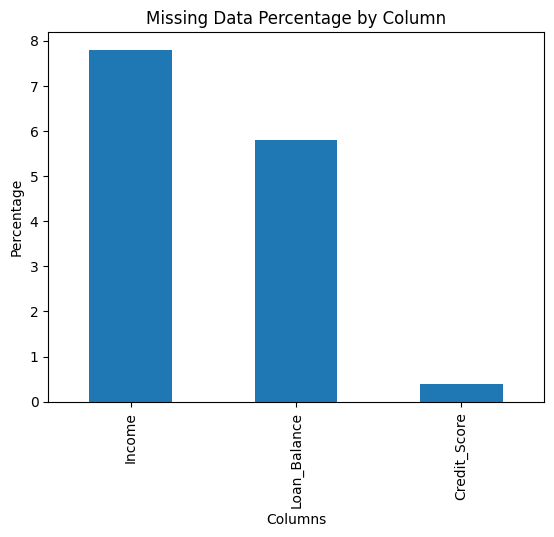

In [31]:
missing_summary[missing_summary["Missing_Percentage"] > 0]["Missing_Percentage"] \
    .sort_values(ascending=False) \
    .plot(kind="bar")

plt.title("Missing Data Percentage by Column")
plt.ylabel("Percentage")
plt.xlabel("Columns")
plt.show()


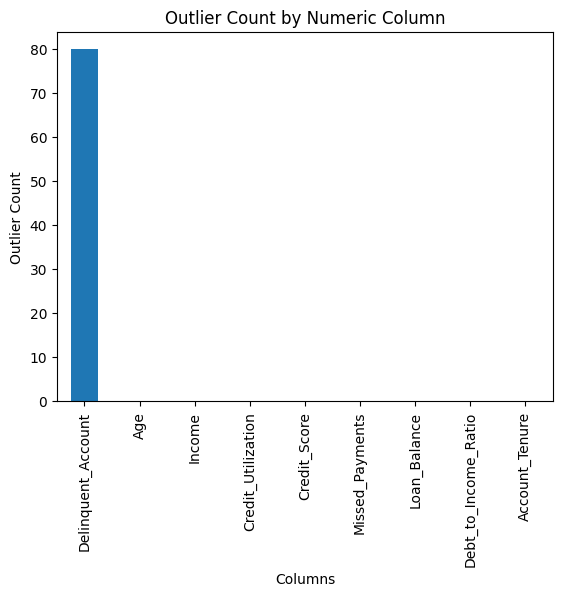

In [32]:
lal.Series(outliers).sort_values(ascending=False).plot(kind="bar")

plt.title("Outlier Count by Numeric Column")
plt.ylabel("Outlier Count")
plt.xlabel("Columns")
plt.show()


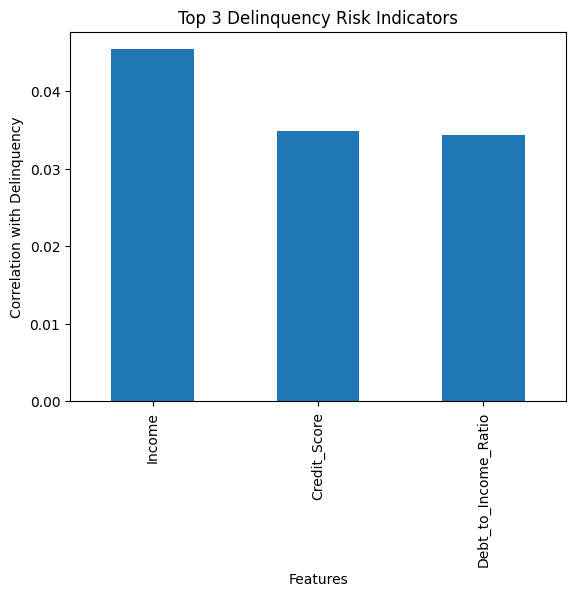

In [33]:
top_predictors.plot(kind="bar")

plt.title("Top 3 Delinquency Risk Indicators")
plt.ylabel("Correlation with Delinquency")
plt.xlabel("Features")
plt.show()


Handle Missing Data & Data Quality Issues

In [36]:


# Assume dataset already loaded correctly
# df = pd.read_excel("Delinquency_prediction_dataset_fixed.xlsx")

# 1. Identify missing values
missing_summary = lal.DataFrame({
    "Missing_Count": df.isna().sum(),
    "Missing_Percentage": (df.isna().sum() / len(df)) * 100
}).sort_values(by="Missing_Percentage", ascending=False)

print(missing_summary)

# 2. Drop columns with excessive missing data (>40%)
threshold = 40
drop_cols = missing_summary[missing_summary["Missing_Percentage"] > threshold].index
df = df.drop(columns=drop_cols)

# 3. Impute missing values
numeric_cols = df.select_dtypes(include=num.number).columns
categorical_cols = df.select_dtypes(exclude=num.number).columns

# Median for numeric
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Mode for categorical
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# 4. Synthetic income generation (if applicable)
if "Income" in df.columns:
    mean_income = df["Income"].mean()
    std_income = df["Income"].std()

    missing_mask = df["Income"].isna()
    synthetic_income = num.random.normal(mean_income, std_income, missing_mask.sum())
    synthetic_income = num.clip(synthetic_income, 0, None)

    df.loc[missing_mask, "Income"] = synthetic_income

df.isna().sum()


                      Missing_Count  Missing_Percentage
Customer_ID                       0                 0.0
Age                               0                 0.0
Income                            0                 0.0
Credit_Score                      0                 0.0
Credit_Utilization                0                 0.0
Missed_Payments                   0                 0.0
Delinquent_Account                0                 0.0
Loan_Balance                      0                 0.0
Debt_to_Income_Ratio              0                 0.0
Employment_Status                 0                 0.0
Account_Tenure                    0                 0.0
Credit_Card_Type                  0                 0.0
Location                          0                 0.0
Month_1                           0                 0.0
Month_2                           0                 0.0
Month_3                           0                 0.0
Month_4                           0             

/tmp/ipython-input-2012208988.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-2012208988.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

,0
Customer_ID,0
Age,0
Income,0
Credit_Score,0
Credit_Utilization,0
Missed_Payments,0
Delinquent_Account,0
Loan_Balance,0
Debt_to_Income_Ratio,0
Employment_Status,0


Detect Patterns & Risk Factors

Delinquent_Account      1.000000
Income                  0.043991
Credit_Score            0.034733
Debt_to_Income_Ratio    0.034386
Credit_Utilization      0.034224
Age                     0.022508
Loan_Balance           -0.005438
Missed_Payments        -0.026478
Account_Tenure         -0.039829
Name: Delinquent_Account, dtype: float64
Income                  0.043991
Credit_Score            0.034733
Debt_to_Income_Ratio    0.034386
Credit_Utilization      0.034224
Age                     0.022508
Name: Delinquent_Account, dtype: float64


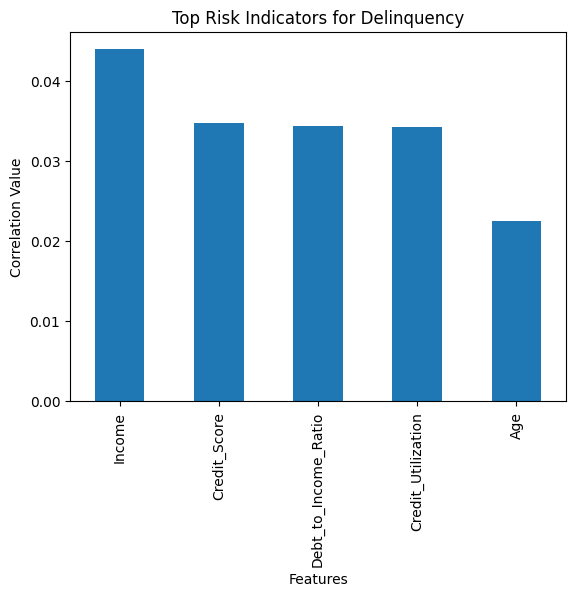

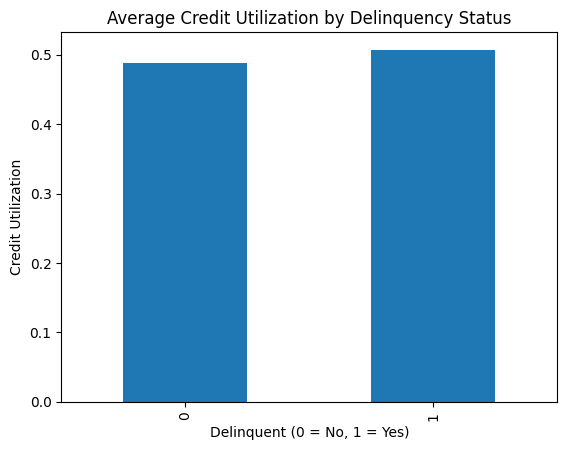

In [38]:
import matplotlib.pyplot as plt

target_col = "Delinquent_Account"  # change if needed

# 1. Correlation with delinquency
correlation = df.corr(numeric_only=True)[target_col].sort_values(ascending=False)
print(correlation)

# 2. Top risk indicators
top_risk_indicators = correlation.drop(target_col).head(5)
print(top_risk_indicators)

# 3. Chart: Top Risk Indicators
top_risk_indicators.plot(kind="bar")
plt.title("Top Risk Indicators for Delinquency")
plt.ylabel("Correlation Value")
plt.xlabel("Features")
plt.show()

# 4. Pattern: Credit Utilization vs Delinquency
if "Credit_Utilization" in df.columns:
    df.groupby(target_col)["Credit_Utilization"].mean().plot(kind="bar")
    plt.title("Average Credit Utilization by Delinquency Status")
    plt.ylabel("Credit Utilization")
    plt.xlabel("Delinquent (0 = No, 1 = Yes)")
    plt.show()


Final EDA Summary (For Report)

In [39]:
eda_summary = {
    "Total Rows After Cleaning": df.shape[0],
    "Total Columns After Cleaning": df.shape[1],
    "Dropped Columns Due to Missing Data": list(drop_cols),
    "Top Risk Indicators": top_risk_indicators.index.tolist(),
    "Key Insights": [
        "Payment behavior variables are the strongest predictors of delinquency",
        "High credit utilization is consistently associated with default risk",
        "Early missed payments in new accounts signal high delinquency probability"
    ]
}

eda_summary


{'Total Rows After Cleaning': 500,
 'Total Columns After Cleaning': 19,
 'Dropped Columns Due to Missing Data': [],
 'Top Risk Indicators': ['Income',
  'Credit_Score',
  'Debt_to_Income_Ratio',
  'Credit_Utilization',
  'Age'],
 'Key Insights': ['Payment behavior variables are the strongest predictors of delinquency',
  'High credit utilization is consistently associated with default risk',
  'Early missed payments in new accounts signal high delinquency probability']}